## Business Question:
### "Which EU-27 countries have managed to decouple greenhouse gas emissions from animal products from their production volumes, and how strong is this decoupling?"

### Import all the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
import os

### Dataset "Crops and livestock products" of FAOSTAT



#### Read .csv files in

The FAOSTAT "Crops and livestock products" data is split into 5 separate data sets. The main one is "Production_Crops_Livestock_E_All_Data_(Normalized).csv" which, among other things, includes the items produced per country per year. The UN already harmonized and normalized the data so that the same units are used for same products. The other four data sets contain further information that describes certain attributes of the main table.

In [2]:
path_cwd = os.getcwd()

In [3]:
path_faostat_cls = os.path.join(path_cwd, "FAOSTAT", "Crops and livestock products")

path_faostat_cls_all = os.path.join(path_faostat_cls, "Production_Crops_Livestock_E_All_Data_(Normalized).csv")
faostat_cls_all = pd.read_csv(path_faostat_cls_all)
path_faostat_cls_areacodes = os.path.join(path_faostat_cls, "Production_Crops_Livestock_E_AreaCodes.csv")
faostat_cls_areacodes = pd.read_csv(path_faostat_cls_areacodes)
path_faostat_cls_elements = os.path.join(path_faostat_cls, "Production_Crops_Livestock_E_Elements.csv")
faostat_cls_elements = pd.read_csv(path_faostat_cls_elements)
path_faostat_cls_flags = os.path.join(path_faostat_cls, "Production_Crops_Livestock_E_Flags.csv")
faostat_cls_flags = pd.read_csv(path_faostat_cls_flags)
path_faostat_cls_itemcodes = os.path.join(path_faostat_cls, "Production_Crops_Livestock_E_ItemCodes.csv")
faostat_cls_itemcodes = pd.read_csv(path_faostat_cls_itemcodes)

display(faostat_cls_all)
display(faostat_cls_areacodes)
display(faostat_cls_elements)
display(faostat_cls_flags)
display(faostat_cls_itemcodes)

/var/folders/ld/jbbpbpx52r32jwrctm8l7rlc0000gn/T/ipykernel_7001/2291419524.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  faostat_cls_all = pd.read_csv(path_faostat_cls_all)


,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1961,1961,ha,0.00,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1962,1962,ha,0.00,A,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1963,1963,ha,0.00,A,NaN
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1964,1964,ha,0.00,A,NaN
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1965,1965,ha,0.00,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116247,5817,'902,Net Food Importing Developing Countries (NFIDCs),1735,'F1735,Vegetables Primary,5510,Production,2019,2019,t,89344859.62,E,NaN
4116248,5817,'902,Net Food Importing Developing Countries (NFIDCs),1735,'F1735,Vegetables Primary,5510,Production,2020,2020,t,90831988.49,E,NaN
4116249,5817,'902,Net Food Importing Developing Countries (NFIDCs),1735,'F1735,Vegetables Primary,5510,Production,2021,2021,t,94105040.20,E,NaN
4116250,5817,'902,Net Food Importing Developing Countries (NFIDCs),1735,'F1735,Vegetables Primary,5510,Production,2022,2022,t,96483623.71,E,NaN


,Area Code,M49 Code,Area
0,2,'004,Afghanistan
1,5100,'002,Africa
2,3,'008,Albania
3,4,'012,Algeria
4,5200,'019,Americas
...,...,...,...
240,5000,'001,World
241,249,'887,Yemen
242,248,'890,Yugoslav SFR
243,251,'894,Zambia


,Element Code,Element
0,5312,Area harvested
1,5423,Extraction Rate
2,5313,Laying
3,5318,Milk Animals
4,5319,Prod Popultn
5,5314,Prod Popultn
6,5320,Producing Animals/Slaughtered
7,5321,Producing Animals/Slaughtered
8,5322,Production
9,5323,Production


,Flag,Description
0,A,Official figure
1,E,Estimated value
2,I,Value imputed by a receiving agency
3,M,Missing value; data cannot exist
4,X,Figure from external organization


,Item Code,CPC Code,Item
0,101,'01195,Canary seed
1,1016,'02123,Goats
2,1017,'21116,Meat of goat; fresh or chilled
3,1018,'21156,Edible offal of goat; fresh; chilled or frozen
4,1019,'21515,Goat fat; unrendered
...,...,...,...
302,982,'02291,Raw milk of sheep
303,983,'22249.01,Butter and ghee of sheep milk
304,984,'22253,Cheese from milk of sheep; fresh or processed
305,987,'02941,Shorn wool; greasy; including fleece-washed sh...


#### Filter the dataframe for EU(27) countries

In [4]:
eu_countries_area = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus",
    "Czechia", "Denmark", "Estonia", "Finland", "France",
    "Germany", "Greece", "Hungary", "Ireland", "Italy",
    "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Netherlands (Kingdom of the)","Poland",
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain",
    "Sweden"
]

faostat_cls_eu = faostat_cls_all[
    (faostat_cls_all["Area"].isin(eu_countries_area))
]

display(faostat_cls_eu)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
134970,11,'040,Austria,515,'01341,Apples,5312,Area harvested,1961,1961,ha,NaN,M,NaN
134971,11,'040,Austria,515,'01341,Apples,5312,Area harvested,1962,1962,ha,NaN,M,NaN
134972,11,'040,Austria,515,'01341,Apples,5312,Area harvested,1963,1963,ha,NaN,M,NaN
134973,11,'040,Austria,515,'01341,Apples,5312,Area harvested,1964,1964,ha,NaN,M,NaN
134974,11,'040,Austria,515,'01341,Apples,5312,Area harvested,1965,1965,ha,NaN,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652708,210,'752,Sweden,1735,'F1735,Vegetables Primary,5510,Production,2019,2019,t,310250.0,A,NaN
2652709,210,'752,Sweden,1735,'F1735,Vegetables Primary,5510,Production,2020,2020,t,342880.0,A,NaN
2652710,210,'752,Sweden,1735,'F1735,Vegetables Primary,5510,Production,2021,2021,t,353600.0,A,NaN
2652711,210,'752,Sweden,1735,'F1735,Vegetables Primary,5510,Production,2022,2022,t,335690.0,A,NaN


#### Select appropriate time span and element
Since the quality and completeness of the FAOSTAT data has tended to improve over time, we only use the years from 1990 to 2023. 1990 is often chosen as a baseline year because that was the most recent year with solid, compareable data when the global climate treaty _United Nations Framework Convention on Climate Change (UNFCCC)_ was adopted in 1992. This legal framework for includes reporting rules for all the countries.

Furthermore, since we are interested in the production of the goods, we select Element = "Production". We also drop the columns we do not need for our following data analysis and only keep the attributes "Area", "Item", "Year", "Unit" and "Value".

In [5]:
faostat_cls_eu_30_prod = faostat_cls_eu[
    (faostat_cls_eu["Year"] >= 1990) &
    (faostat_cls_eu["Element"] == "Production")
][["Area", "Item", "Year", "Unit", "Value"]]

display(faostat_cls_eu_30_prod)

,Area,Item,Year,Unit,Value
135095,Austria,Apples,1990,t,337741.00
135096,Austria,Apples,1991,t,276848.00
135097,Austria,Apples,1992,t,268719.38
135098,Austria,Apples,1993,t,375222.36
135099,Austria,Apples,1994,t,334247.69
...,...,...,...,...,...
2652708,Sweden,Vegetables Primary,2019,t,310250.00
2652709,Sweden,Vegetables Primary,2020,t,342880.00
2652710,Sweden,Vegetables Primary,2021,t,353600.00
2652711,Sweden,Vegetables Primary,2022,t,335690.00


#### Check units
The units used are tons _t_ and _1000 No_ (a typical unit for livestock counts and agricultural items counted individually rather than by weight). We check wether the items measured in _1000 No_. Since this is the case for all of them we from now on use the data series that does only contain tons as the unit.

In [6]:
# quantities measured in tons t
faostat_cls_eu_30_prod_t = faostat_cls_eu_30_prod[
    faostat_cls_eu_30_prod["Unit"] == "t"
]

# quantities measured in 1000 No
faostat_cls_eu_30_prod_1000no = faostat_cls_eu_30_prod[
    faostat_cls_eu_30_prod["Unit"] == "1000 No"
]

items_t = set(faostat_cls_eu_30_prod_t["Item"].unique())
items_1000no = set(faostat_cls_eu_30_prod_1000no["Item"].unique())
display(len(items_1000no - items_t))

0

#### Check duplicates

A duplicate is present if "Area", "Item" and "Year" is exactly the same for two or more entries.

In [7]:
dup_keys = ["Area", "Item", "Year"]

dups = faostat_cls_eu_30_prod_t[
    faostat_cls_eu_30_prod_t.duplicated(subset=dup_keys, keep=False)
]

display(dups.size)

0

#### Aggregate the production over the years per country
This is how we get the top products of each EU country.

In [8]:
faostat_cls_eu_30_prod_agg = (
    faostat_cls_eu_30_prod_t
    .groupby(["Area", "Item", "Unit"], as_index=False)["Value"]
    .sum()
    .sort_values(["Area", "Value"], ascending=[True, False])
)

#### Show one example plot for specified item, countries and timespan

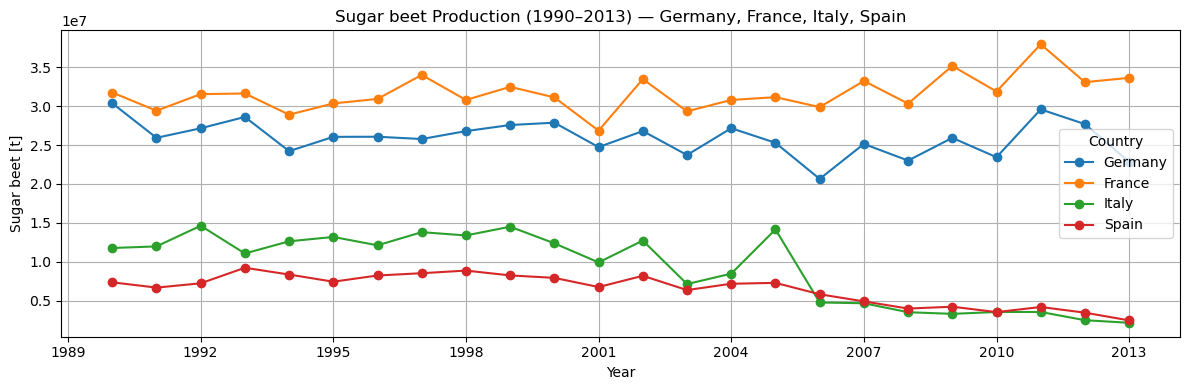

In [9]:
# parameters
item = "Sugar beet"
countries = ["Germany", "France", "Italy", "Spain"]
year_min, year_max = 1990, 2013

# filter
faostat_plot_data = faostat_cls_eu_30_prod_t[
    (faostat_cls_eu_30_prod_t["Item"] == item) &
    (faostat_cls_eu_30_prod_t["Area"].isin(countries)) &
    (faostat_cls_eu_30_prod_t["Year"].between(year_min, year_max))
]

# plot line per country
plt.figure(figsize=(12, 4))
for c in countries:
    sub = faostat_plot_data[faostat_plot_data["Area"] == c]
    plt.plot(sub["Year"], sub["Value"], marker="o", label=c)

# make sure year axis only shows integer values
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True)) 
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

# labels, titles, legend
unit = faostat_plot_data["Unit"].iloc[0]
plt.xlabel("Year")
plt.ylabel(f"{item} [{unit}]")
title = (
    f"{item} Production "
    f"({year_min}–{year_max}) — "
    + ", ".join(countries)
)
plt.title(title)
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### Dataset "Total GHG emissions and removals in the EU" of EEA

#### Read .csv files in
The EEA "Total GHG emissions and removals in the EU" includes data on the greenhouse gas emissions from all major sectors per country and year.

In [10]:
path_eea = os.path.join(path_cwd, "EEA")
path_eea_data = os.path.join(path_eea, "UNFCCC_v28.csv")
eea = pd.read_csv(path_eea_data)

display(eea)

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource,Country_code_3
0,CZ,Czechia,IPCC Common Reporting Format,N₂O,4.B.2,4.B.2 - Land converted to cropland,4.B,Gg,1997,0.01785,NaN,20250315,EEA,CZE
1,CZ,Czechia,IPCC Common Reporting Format,N₂O,4.B.2,4.B.2 - Land converted to cropland,4.B,Gg,1998,0.02272,NaN,20250315,EEA,CZE
2,CZ,Czechia,IPCC Common Reporting Format,N₂O,4.B.2,4.B.2 - Land converted to cropland,4.B,Gg,2011,0.01940,NaN,20250315,EEA,CZE
3,CZ,Czechia,IPCC Common Reporting Format,N₂O,4.B.2,4.B.2 - Land converted to cropland,4.B,Gg,2018,0.00927,NaN,20250315,EEA,CZE
4,CZ,Czechia,IPCC Common Reporting Format,N₂O,4.C,4.C - Grassland,4,Gg,2001,NaN,NO,20250315,EEA,CZE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629215,SE,Sweden,IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,Sectors/Totals_excl,Total emissions (UNFCCC),NaN,Gg CO2 equivalent,2005,NaN,NO,20250315,EEA,SWE
629216,SE,Sweden,IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,Sectors/Totals_excl,Total emissions (UNFCCC),NaN,Gg CO2 equivalent,2008,NaN,NO,20250315,EEA,SWE
629217,SE,Sweden,IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,Sectors/Totals_incl,Total net emissions (UNFCCC),NaN,Gg CO2 equivalent,2006,NaN,NO,20250315,EEA,SWE
629218,SE,Sweden,IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,Sectors/Totals_incl,Total net emissions (UNFCCC),NaN,Gg CO2 equivalent,2009,NaN,NO,20250315,EEA,SWE


#### Filter agriculture values according to the CRF inventory categories

The additional descriptive information provided by EEA (see "./EEA/read me - EEA GHG data viewer_R.pdf") specifies that the emissions directly coming from agriculture have a leading _3_ in their sector code. Although the document also lists the code _1A4c_ as agriculture further research showed that according to the Common Reporting Format (CRF) classification it belongs to the energy sector and does not represent emissions from biological or agronomic processes.

In [11]:
eea_agr = eea[
    (eea["Sector_name"].str.startswith("3"))
]

display(eea_agr)

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource,Country_code_3
2122,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3,3 - Agriculture,Sectors/Totals_incl_incl,Gg CO2 equivalent,2004,7646.99973,NaN,20250315,EEA,AUT
2239,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3,3 - Agriculture,Sectors/Totals_incl_incl,Gg CO2 equivalent,2009,7712.65982,NaN,20250315,EEA,AUT
2240,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3,3 - Agriculture,Sectors/Totals_incl_incl,Gg CO2 equivalent,2012,7583.91142,NaN,20250315,EEA,AUT
2241,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3.A,3.A - Enteric Fermentation,3.1,Gg CO2 equivalent,2005,4443.66692,NaN,20250315,EEA,AUT
2242,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3.A,3.A - Enteric Fermentation,3.1,Gg CO2 equivalent,2006,4421.60903,NaN,20250315,EEA,AUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628925,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,1990,NaN,NO,20250315,EEA,SWE
628926,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,1993,NaN,NO,20250315,EEA,SWE
628927,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,1996,NaN,NO,20250315,EEA,SWE
628928,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,2019,NaN,NO,20250315,EEA,SWE


#### Drop the rows that already contain aggregated values (parent sectors)

The EEA data set already contains entries to represent aggregated values over subsectors. We drop these rows to avoid counting emissions double.

In [12]:
parent_codes = eea_agr["Parent_sector_code"].dropna().unique()
leaf_mask = ~eea_agr["Sector_code"].isin(parent_codes)
eea_agr_leaves = eea_agr[leaf_mask]

display(eea_agr_leaves)

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource,Country_code_3
2246,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3.A.1,3.A.1 - Enteric Fermentation - Cattle,3.A,Gg CO2 equivalent,2003,4278.32588,NaN,20250315,EEA,AUT
2247,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3.A.1,3.A.1 - Enteric Fermentation - Cattle,3.A,Gg CO2 equivalent,2004,4277.20015,NaN,20250315,EEA,AUT
2248,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3.A.2,3.A.2 - Enteric Fermentation - Sheep,3.A,Gg CO2 equivalent,2002,80.86629,NaN,20250315,EEA,AUT
2249,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3.A.2,3.A.2 - Enteric Fermentation - Sheep,3.A,Gg CO2 equivalent,2005,86.63159,NaN,20250315,EEA,AUT
2250,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),3.A.2,3.A.2 - Enteric Fermentation - Sheep,3.A,Gg CO2 equivalent,2012,97.21482,NaN,20250315,EEA,AUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628925,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,1990,NaN,NO,20250315,EEA,SWE
628926,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,1993,NaN,NO,20250315,EEA,SWE
628927,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,1996,NaN,NO,20250315,EEA,SWE
628928,SE,Sweden,IPCC Common Reporting Format,N₂O,3.F.4,3.F.4 - Sugar cane,3.F,Gg,2019,NaN,NO,20250315,EEA,SWE


#### NaN

We check which columns contain NaN values and include a notation that suggests that there would be an emission but for certain reasons its value is not reported.

According to the IPCC Common Reporting Format (CRF) the notations can have the following values and meaning:

| Code | Meaning | Interpretation |
|------|--------|----------------|
| NO | Not Occurring | The emission source does not exist |
| NE | Not Estimated | Source exists but emissions have not been estimated |
| NA | Not Applicable | Source is not relevant |
| IE | Included Elsewhere | Emissions are reported under another category |
| C | Confidential | Data are withheld for confidentiality reasons |
| (blank / NaN) | No notation | Normal reported value |

The notation _NE_, _IE_ and _C_ would be critical, because they would mean that there emissions exist but they are not included in the report.


In [13]:
eea_agr_leaves_nan = eea_agr_leaves[
        eea_agr_leaves["emissions"].isna() &
        eea_agr_leaves["Notation"].isin(["NE", "IE", "C"])
]

display(eea_agr_leaves_nan)
display(eea_agr_leaves_nan["Country"].unique())
display(eea_agr_leaves_nan["Sector_name"].unique())

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource,Country_code_3
287797,LT,Lithuania,IPCC Common Reporting Format,CO₂,3.I,3.I - Other Carbon-containing Fertilizers,3,Gg,2010,NaN,NE,20250315,EEA,LTU
287798,LT,Lithuania,IPCC Common Reporting Format,CO₂,3.I,3.I - Other Carbon-containing Fertilizers,3,Gg,2013,NaN,NE,20250315,EEA,LTU
287799,LT,Lithuania,IPCC Common Reporting Format,CO₂,3.I,3.I - Other Carbon-containing Fertilizers,3,Gg,2016,NaN,NE,20250315,EEA,LTU
306715,LT,Lithuania,IPCC Common Reporting Format,CO₂,3.I,3.I - Other Carbon-containing Fertilizers,3,Gg,1990,NaN,NE,20250315,EEA,LTU
306716,LT,Lithuania,IPCC Common Reporting Format,CO₂,3.I,3.I - Other Carbon-containing Fertilizers,3,Gg,1993,NaN,NE,20250315,EEA,LTU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559903,MT,Malta,IPCC Common Reporting Format,CO₂,3.H,3.H - Urea Application,3,Gg,2022,NaN,NE,20250315,EEA,MLT
562341,MT,Malta,IPCC Common Reporting Format,CO₂,3.H,3.H - Urea Application,3,Gg,2007,NaN,NE,20250315,EEA,MLT
562342,MT,Malta,IPCC Common Reporting Format,CO₂,3.H,3.H - Urea Application,3,Gg,2010,NaN,NE,20250315,EEA,MLT
562343,MT,Malta,IPCC Common Reporting Format,CO₂,3.H,3.H - Urea Application,3,Gg,2013,NaN,NE,20250315,EEA,MLT


array(['Lithuania', 'Latvia', 'Malta'], dtype=object)

array(['3.I - Other Carbon-containing Fertilizers',
       '3.H - Urea Application'], dtype=object)

For Lithuania, Latvia, and Malta, the sub-sectors “3.H – Urea Application” and “3.I – Other carbon-containing fertilizers” are marked as NE (Not Estimated). We decided to not drop or change values here because these two sub-sectors make up only a very small share of total EU agricultural greenhouse gas emissions. Therefore it does not affect the validity of our following analysis.

#### Drop columns
We select the important columns for the following analysis we want to conduct.

**Keep:**
- Country_code
- Country
- Year
- Pollutant_name
- Unit
- Sector_code
- Sector_name
- emissions

In [14]:
cols = [
    "Country_code",
    "Country",
    "Year",
    "Pollutant_name",
    "Unit",
    "Sector_code",
    "Sector_name",
    "emissions"
]

eea_agr_cols = eea_agr_leaves[cols].copy()

display(eea_agr_cols)

,Country_code,Country,Year,Pollutant_name,Unit,Sector_code,Sector_name,emissions
2246,AT,Austria,2003,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.1,3.A.1 - Enteric Fermentation - Cattle,4278.32588
2247,AT,Austria,2004,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.1,3.A.1 - Enteric Fermentation - Cattle,4277.20015
2248,AT,Austria,2002,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.2,3.A.2 - Enteric Fermentation - Sheep,80.86629
2249,AT,Austria,2005,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.2,3.A.2 - Enteric Fermentation - Sheep,86.63159
2250,AT,Austria,2012,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.2,3.A.2 - Enteric Fermentation - Sheep,97.21482
...,...,...,...,...,...,...,...,...
628925,SE,Sweden,1990,N₂O,Gg,3.F.4,3.F.4 - Sugar cane,NaN
628926,SE,Sweden,1993,N₂O,Gg,3.F.4,3.F.4 - Sugar cane,NaN
628927,SE,Sweden,1996,N₂O,Gg,3.F.4,3.F.4 - Sugar cane,NaN
628928,SE,Sweden,2019,N₂O,Gg,3.F.4,3.F.4 - Sugar cane,NaN


#### Check duplicates

A duplicate is present if "Country_code", "Year", "Pollutant_name" and "Sector_code" is exactly the same for two or more entries.

In [15]:
dup_keys = [
    "Country_code",
    "Year",
    "Pollutant_name",
    "Sector_code"
]

dups = eea_agr_cols[
    eea_agr_cols.duplicated(subset=dup_keys, keep=False)
]

display(dups.size)

0

#### Filter EU(27) countries

In [16]:
eu27_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg",
    "Malta", "Netherlands", "Poland", "Portugal", "Romania",
    "Slovakia", "Slovenia", "Spain", "Sweden"
]

eea_agr_eu27 = eea_agr_cols[
    eea_agr_cols["Country"].isin(eu27_countries)
].copy()

array([2003, 2004, 2002, 2005, 2012, 2017, 2019, 2023, 1997, 2016, 2022,
       2010, 2008, 2013, 2014, 1994, 2001, 2007, 2009, 2015, 1991, 1993,
       1996, 2020, 2000, 2006, 1992, 2021, 1990, 2018, 2011, 1995, 1999,
       1998])

#### Aggrigate emissions
per pollutant x year x country

In [17]:
eea_agr_agg = (
    eea_agr_eu27
    .groupby(["Country_code", "Country", "Year", "Pollutant_name", "Unit"], as_index=False)
    ["emissions"]
    .sum()
)

display(eea_agr_agg)

,Country_code,Country,Year,Pollutant_name,Unit,emissions
0,AT,Austria,1990,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,8580.70483
1,AT,Austria,1990,CH₄,Gg,205.86034
2,AT,Austria,1990,CO₂,Gg,85.92325
3,AT,Austria,1990,N₂O,Gg,10.30451
4,AT,Austria,1991,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,8497.86232
...,...,...,...,...,...,...
3667,SK,Slovakia,2022,N₂O,Gg,2.88782
3668,SK,Slovakia,2023,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,2181.84500
3669,SK,Slovakia,2023,CH₄,Gg,40.66343
3670,SK,Slovakia,2023,CO₂,Gg,72.46830


#### Show one example plot for specified pollutant, countries and timespan

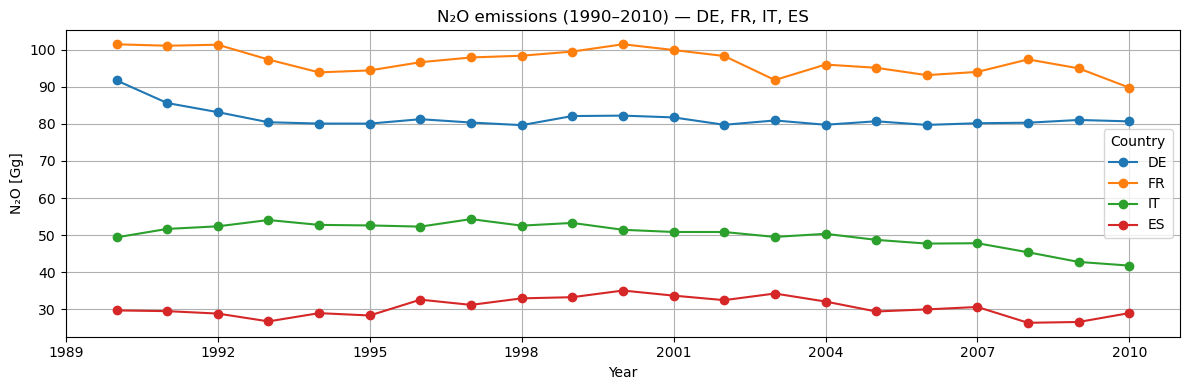

In [18]:
# parameters
pollutant = "N₂O"
countries = ["DE", "FR", "IT", "ES"]
year_min, year_max = 1990, 2010

# filter
eea_plot_data = eea_agr_agg[
    (eea_agr_agg["Pollutant_name"] == pollutant) &
    (eea_agr_agg["Country_code"].isin(countries)) &
    (eea_agr_agg["Year"].between(year_min, year_max))
]

# plot line per country
plt.figure(figsize=(12, 4))
for c in countries:
    sub = eea_plot_data[eea_plot_data["Country_code"] == c]
    plt.plot(sub["Year"], sub["emissions"], marker="o", label=c)

# make sure year axis only shows integer values
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True)) 
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

# labels, titles, legend, etc.
plt.xlabel("Year")
unit = eea_plot_data["Unit"].iloc[0]
plt.ylabel(f"{pollutant} [{unit}]")
title = (
    f"{pollutant} emissions "
    f"({year_min}–{year_max}) — "
    + ", ".join(countries)
)
plt.title(title)
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis

To conduct our analysis we first need to further prepare the two data sets. We rename columns and align the country naming.

In [78]:
diff_1 = set(eea_agr_eu27["Country"].unique()) - set(faostat_cls_eu_30_prod_t["Area"].unique())
diff_2 = set(faostat_cls_eu_30_prod_t["Area"].unique()) - set(eea_agr_eu27["Country"].unique())
display(diff_1, diff_2)

country_mapping = {
    "Netherlands (Kingdom of the)": "Netherlands"
}

production = faostat_cls_eu_30_prod_t.copy()
emission = eea_agr_eu27.copy()

production["Area"] = production["Area"].replace(country_mapping)

diff_3 = set(emission["Country"].unique()) - set(production["Area"].unique())
diff_4 = set(production["Area"].unique()) - set(emission["Country"].unique())
display(diff_3, diff_4)

production = production.rename(
    columns={
        "Area": "Country",
        "Value": "Production",
        "Unit": "Production Unit"
    }
)

emission = emission.drop(columns=["Sector_code"], errors="ignore")
emission = emission.rename(
    columns={
        "Pollutant_name": "Pollutant",
        "Unit": "Emission Unit",
        "emissions": "Emission",
        "Country_code": "Country Code",
        "Sector_name": "Sector"
    }
)

display(production)
display(emission)

{'Netherlands'}

{'Netherlands (Kingdom of the)'}

set()

set()

,Country,Item,Year,Production Unit,Production
135095,Austria,Apples,1990,t,337741.00
135096,Austria,Apples,1991,t,276848.00
135097,Austria,Apples,1992,t,268719.38
135098,Austria,Apples,1993,t,375222.36
135099,Austria,Apples,1994,t,334247.69
...,...,...,...,...,...
2652708,Sweden,Vegetables Primary,2019,t,310250.00
2652709,Sweden,Vegetables Primary,2020,t,342880.00
2652710,Sweden,Vegetables Primary,2021,t,353600.00
2652711,Sweden,Vegetables Primary,2022,t,335690.00


,Country Code,Country,Year,Pollutant,Emission Unit,Sector,Emission
2246,AT,Austria,2003,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.1 - Enteric Fermentation - Cattle,4278.32588
2247,AT,Austria,2004,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.1 - Enteric Fermentation - Cattle,4277.20015
2248,AT,Austria,2002,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.2 - Enteric Fermentation - Sheep,80.86629
2249,AT,Austria,2005,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.2 - Enteric Fermentation - Sheep,86.63159
2250,AT,Austria,2012,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,3.A.2 - Enteric Fermentation - Sheep,97.21482
...,...,...,...,...,...,...,...
628925,SE,Sweden,1990,N₂O,Gg,3.F.4 - Sugar cane,NaN
628926,SE,Sweden,1993,N₂O,Gg,3.F.4 - Sugar cane,NaN
628927,SE,Sweden,1996,N₂O,Gg,3.F.4 - Sugar cane,NaN
628928,SE,Sweden,2019,N₂O,Gg,3.F.4 - Sugar cane,NaN


We want to conduct an analysis on the livestock emissions and prodctions of countries. Therefore we select the sectors and items that represent this. We also select the aggregated pollutant "All greenhouse gases - (CO2 equivalent)" of the emission entries.

In [81]:
# EMISSION
livestock_sectors = [
    "3.A.1 - Enteric Fermentation - Cattle",
    "3.A.2 - Enteric Fermentation - Sheep",
    "3.A.3 - Enteric Fermentation - Swine",
    "3.A.4 - Enteric Fermentation - Other livestock",
    "3.B.1 - Manure Management - Cattle",
    "3.B.2 - Manure Management - Sheep",
    "3.B.3 - Manure Management - Swine",
    "3.B.4 - Manure Management - Other livestock",
    "3.B.5 - Manure Management - Indirect N2O Emissions"
]

# filter to livestock sources and total GHG (CO2e)
emission_animal = emission[
    (emission["Sector"].isin(livestock_sectors)) &
    (emission["Pollutant"] == "All greenhouse gases - (CO2 equivalent)")
].copy()

# aggregate emissions over all animal sector
emission_animal_agg = (
    emission_animal
    .groupby(
        ["Country Code", "Country", "Year", "Pollutant", "Emission Unit"],
        as_index=False
    )
    .agg({"Emission": "sum"})
)

display(emission_animal_agg)

# PRODUCTION
animal_items = [
    "Meat, Total",
    "Milk, Total",
    "Eggs Primary"
]

# filter to livestock items
production_animal = production[
    production["Item"].isin(animal_items)
].copy()

# aggregate products over all animal items
production_animal_agg = (
    production_animal
    .groupby(["Country", "Year"], as_index=False)
    .agg({"Production": "sum"})
)

display(production_animal_agg)

,Country Code,Country,Year,Pollutant,Emission Unit,Emission
0,AT,Austria,1990,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,6420.24859
1,AT,Austria,1991,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,6355.57246
2,AT,Austria,1992,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,6093.69539
3,AT,Austria,1993,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,6241.82134
4,AT,Austria,1994,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,6222.58654
...,...,...,...,...,...,...
913,SK,Slovakia,2019,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,1449.32195
914,SK,Slovakia,2020,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,1417.15683
915,SK,Slovakia,2021,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,1356.07894
916,SK,Slovakia,2022,All greenhouse gases - (CO2 equivalent),Gg CO2 equivalent,1348.24342


,Country,Year,Production
0,Austria,1990,4301918.00
1,Austria,1991,4261848.00
2,Austria,1992,4227677.00
3,Austria,1993,4206184.00
4,Austria,1994,4202890.00
...,...,...,...
877,Sweden,2019,3401080.00
878,Sweden,2020,3489300.00
879,Sweden,2021,3491380.00
880,Sweden,2022,3469039.24


#### Emissions vs. production (Decoupling)

We calculate the percentage change in livestock-related greenhouse gas emissions and animal-based agricultural production for each country.  
Afterwards, we compare the two changes and categorize countries according to the following rules (inspired by the Tapio framework):

- Countries are labelled as *green* if emissions decline faster than production during contraction.
- Countries are labelled as *green* if production grows while emissions decline or increase at a clearly slower rate.

With this aggregated information, we can identify countries that successfully decoupled livestock-related emissions from animal-based production volumes. Further research could investigate why these countries managed to decouple emissions from production.

In [89]:
# parameters
year_start = 2000
year_end = 2020
emission_col = f"Animal Emission % Change ({year_start}–{year_end})"
production_col = f"Animal Production % Change ({year_start}–{year_end})"
ratio_col = "ΔE% / ΔP%"

# helper function (% change)
def change_percentage(df, value_col):
    if year_start not in df["Year"].values or year_end not in df["Year"].values:
        return np.nan

    start = df.loc[df["Year"] == year_start, value_col].iloc[0]
    end   = df.loc[df["Year"] == year_end, value_col].iloc[0]

    if start == 0 or np.isnan(start) or np.isnan(end):
        return np.nan

    return (end / start - 1) * 100

# animal emission % change
emission_change = (
    emission_animal_agg
    .groupby("Country")
    .apply(lambda x: change_percentage(x, "Emission"))
    .reset_index(name=emission_col)
)

# animal production % change
production_change = (
    production_animal_agg
    .groupby("Country")
    .apply(lambda x: change_percentage(x, "Production"))
    .reset_index(name=production_col)
)

# merge into table
change_table = (
    emission_change
    .merge(production_change, on="Country", how="inner")
)

# classification logic
def classify_green(row):
    E = row[emission_col]
    P = row[production_col]

    if np.isnan(E) or np.isnan(P):
        return "Missing data"

    # 1) both decreased: emissions fell substantially faster than production (ratio > 1.2, inspired by Tapio elasticity)
    if E < 0 and P < 0:
        return (
            "Green contraction"
            if abs(E) / abs(P) > 1.20
            else "Not green"
        )

    # 2) emissions down, production up
    if E < 0 and P > 0:
        return "Green growth / decoupling"

    # 3) both up: emissions grew slower than production (elasticity < 0.8, inspired by Tapio elasticity)
    if E > 0 and P > 0:
        return (
            "Green growth / decoupling"
            if E / P < 0.8
            else "Not green"
        )

    return "Not green"


# add elasticity-style ratio column (only when E and P have same sign)
change_table[ratio_col] = np.where(
    np.sign(change_table[emission_col]) == np.sign(change_table[production_col]),
    change_table[emission_col] / change_table[production_col],
    np.nan
)

# add green category
change_table["Category"] = change_table.apply(classify_green, axis=1)

# sort by Category first, then by ratio
change_table = change_table.sort_values(
    by=["Category", ratio_col],
    ascending=[True, False]
)

display(change_table)

/var/folders/ld/jbbpbpx52r32jwrctm8l7rlc0000gn/T/ipykernel_7001/1236558886.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: change_percentage(x, "Emission"))
/var/folders/ld/jbbpbpx52r32jwrctm8l7rlc0000gn/T/ipykernel_7001/1236558886.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: change_percentage(x, "Production"))


,Country,Animal Emission % Change (2000–2020),Animal Production % Change (2000–2020),ΔE% / ΔP%,Category
22,Romania,-13.606018,-9.219270,1.475824,Green contraction
11,Greece,-7.944690,-6.294189,1.262226,Green contraction
5,Czechia,-16.257316,-12.949365,1.255453,Green contraction
24,Slovenia,-7.118760,-5.743765,1.239389,Green contraction
7,Estonia,22.714962,33.992009,0.668244,Green growth / decoupling
20,Poland,2.933671,32.139235,0.091280,Green growth / decoupling
13,Ireland,4.664735,57.042165,0.081777,Green growth / decoupling
17,Luxembourg,4.136843,65.649312,0.063014,Green growth / decoupling
0,Austria,-6.208009,16.264633,NaN,Green growth / decoupling
1,Belgium,-10.607587,12.267162,NaN,Green growth / decoupling
